<h1><center> REGRESSION MODELS </h1></center>

<h3><center> SIMPLE REGRESSION MODELS </h3></center> 

The formula aims to approximate data with a straight line $y = \beta_0 + \beta_1 x$. The algorithm choose the straight line which minimize the square error.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Coefficient: 9312.58 Intercept: 26780.10 Coeff. di determinazione: 0.957


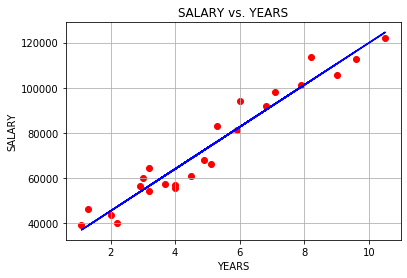

In [81]:
data = pd.read_csv('Dataset/Salary_Data.csv')

# dependent and independent variables.
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

# test and train.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 0) # test size.

# train the model.

# in this case, we compute the correlation between variables.
# REGRESSION IS THE PROCEDURE WHICH ENABLE YOU TO PREDICT CONTINUOUS VALUES,
# WHILE CLASSIFICATION IS USED TO PREDICT DISCRETE VALUES.

classifier = LinearRegression()
classifier.fit(X_train, y_train)

# only the dependent variable.
y_pred = classifier.predict(X_test)

# know the parameters of the line.
LR = r2_score(y, classifier.predict(X))
print('Coefficient: {:.2f}'.format(classifier.coef_[0]),
      'Intercept: {:.2f}'.format(classifier.intercept_),
      'Coeff. di determinazione: {:.3f}'.format(LR))

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, classifier.predict(X_train), color = 'blue')
plt.title('SALARY vs. YEARS')
plt.xlabel('YEARS')
plt.ylabel('SALARY')
plt.grid(True)
plt.show()

In [57]:
# predict a new value.
classifier.predict([[12]])

Coefficient: 9312.58 Intercept: 26780.10


<h3><center> MULTIPLE REGRESSION MODELS </h3></center> 

Assumption of a Linear Regression:
    
- Linearity of coefficients between $X$ and $Y$.
- Homoscedadasticity and normality: errors are picked up from the same gaussian distribution with zero mean and a fix value of variance.
- Independence of errors: 
- Lack of multicollinearity.

http://r-statistics.co/Assumptions-of-Linear-Regression.html

We don't take into account them. 

**_Dummy variables_** are variables obtained by the one-hot-encoding procedure. This technique is used for categorical variables. However, all dummies aren't included in the regression due to the consequent introduction of multicollinearity: **_dummy variable trap_**. The coefficient of a dummy is the difference between the coefficient of a dummy minus the other ones. Indeed, if I specify a dummy in a regression with a specific coefficient, I can wonder where is the coefficient of the others. However, this isn't the right reasoning because the coefficient of the provided variable is the difference between the coefficient of dummies. When the $D_1=1$, $b_1 = b_{D1}-b_{D2}$ and so $b_0+b_1 = b_0 + b_{D1} - b_{D2} = b_0^* + b_{D2} + b_{D1} - b_{D2} = b_0^* + d_{D1}$.

However,  the main problem is that there is a correlation between dummies, indeed $D_i = 1 - D_j$. The collinearity is high. 
The **p-value** is the probability of something occurs assuming the null hypothesis. The $\alpha$  is the threshold below which the null hypothesis is rejected, i.e. **statistically significance**.

Do all the variable be included into the model? No, because garbage in, garbage out. There are different methods (**_Feature selection_**):
- **_All-in_**: all variables and you know that all of them are essential or because it's a step after the following steps. 
- **_Backward elimination_**:  drop the variables at each regression. It's made of different steps:
  - Select a significance level to stay in the model.
  - Fit the full model with the possible predictors.
  - Consider the predictor with the highest p-value.
  - Remove the predictor.
  - Fit the model without this variable. 
  - Back to the step number three and repeat. 
- **_Forward selection_**: it's not only the reverse of the previous model.
  - Select a significance level.
  - Fit all possible simple regression. Select the one with the lowest p-value.
  - Keep this variable and fit all possiblemodels with one extra predictor added to the one(s) you already have
  - Consider the predictor with the lowest p-value. 
  - Repet the step number three. 
  - When a new predictor has a p-value major of alpha, stop.
- **_Bidirectional elimination_**:
  - Define a confidence interval to stay and to inter.
  - Perform the next step of forward selection-
  - Perform all steps of backward elimination.
  - No new variables can enter and no old exist.
- **_Score comparison_**: it's a time consuming model.
  - Select a criterion of goodness of fit
  - Construct all possible regression models
  - Select the one which satisfies the best measures.
  

In [82]:
dataset = pd.read_csv('Dataset/50_Startups.csv')

# SELECT THE DEPENDENT AND INDEPENDENT VARIABLES.

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# ENCODING CATEGORIAL VARIABLES.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

# SPLIT THE DATASET.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2 ,
                                                   random_state = 0)

# IN MULTIPLE LINEAR REGRESSION THERE ISN'T THE NEED TO PERFORM FEATURE SCALING. 
# INDEED, IF A VARIABLE ASSUME HIGH VALUES, THE COEFFICIENT'LL BE SMALL.

# THE PACKAGE TREATS AUTOMATICALLY THE COLLINEARITY OF DUMMIES. 

# FOR THE SAME REASON, THE PACKAGE SELECTS THE MOST SIGNIFICANT VARIABLES.
# SO PREVIUOS MODELS MUSN'T BE PERFORMED.

classifier = LinearRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)


# IF THE MODEL PERFORMS BAD, OTHER ONES CAN BE CARRIED OUT.
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis = 1)

classifier.predict(np.array([[160000, 130000, 300000,0,0,1]]))

MLR = r2_score(y, classifier.predict(X))
print('Coefficient: {:.2f}'.format(classifier.coef_[0]),
      'Intercept: {:.2f}'.format(classifier.intercept_), 
      'Coeff. di determinazione: {:.3f}'.format(MLR))

Coefficient: 86.64 Intercept: 42467.53 Coeff. di determinazione: 0.949


<h3><center> POLYNOMIAL REGRESSION MODELS </h3></center> 

The **linearity** refer to the grade of coefficientes. It is a special case of multiple linear regression.

Coeff. di determinazione: 0.997


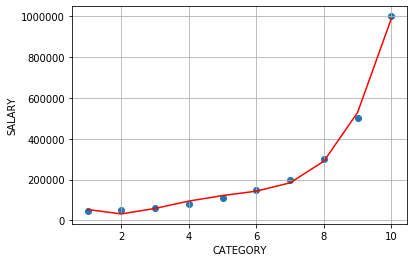

In [126]:
dataset = pd.read_csv('Dataset/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# encoding isn't necessary.
# there aren't missing values.
# we don't split the dataset because it contains only a few observations.

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

classifier = LinearRegression()
classifier.fit(X_poly,y)

PLR = r2_score(y, classifier.predict(X_poly))
print('Coeff. di determinazione: {:.3f}'.format(PLR))

# PLOT THE POLYNOMIAL LINEAR REGRESSION.
 
plt.scatter(X,y)
plt.plot(X,classifier.predict(X_poly), color = 'red')
plt.xlabel('CATEGORY')
plt.ylabel('SALARY')
plt.grid(True)
plt.show()

In [75]:
classifier.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

<h3><center>  SUPPORT VECTOR REGRESSION </h3></center> 

Vapnik has introduced this regression. The algorithm doesn't take into account the points inside the tube when has to compute the error. We care about the distances of points outside the tube. This is a linear model. So, LSVR looks like Simple regression but only with specific set of points. Support vector are the ones which determine the straight lines of tube.

However, this is a sepcial case. Indeed, there are also the non linear support vector regression. 

Feature scaling must be performed because there aren't coefficients that balance the difference of order. 

Coeff. di determinazione: 0.752


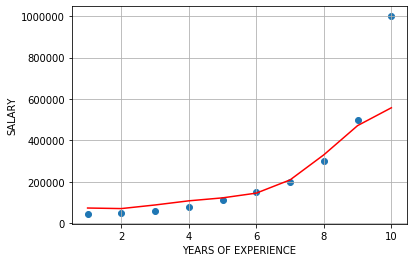

In [127]:
dataset = pd.read_csv('Dataset/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

# for feature scaling: from an array 1D to 2D.
Y = Y.reshape(len(Y),1) 

# FEATURE SCALING: also for the x attribute otherwise it has a 
# different scale from the other one. In this way, the most part of attributes
# stay in the range [-3,3].
from sklearn.preprocessing import StandardScaler
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
#print(sc_X.inverse_transform(X))
# THE SPLITTING DOESN'T OCCUR DUE TO THE SHAPE OF DATASET.

# ENCODING ISN'T NECESSARY.

# PERFORM THE ALGORITHM.
from sklearn.svm import SVR

classifier = SVR(kernel = 'rbf')
classifier.fit(X,Y.reshape(1, len(Y))[0])

SVR_r_2 = r2_score(Y, classifier.predict(X)) 
print('Coeff. di determinazione: {:.3f}'.format(SVR_r_2))

plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y))
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(classifier.predict(X)), color  = 'red')
plt.xlabel('YEARS OF EXPERIENCE')
plt.ylabel('SALARY')
plt.grid(True)
plt.show()

In [78]:
# PREDICT NEW VALUES.
sc_Y.inverse_transform(SupportVR.predict(sc_X.fit_transform([[6.5]])))

array([131106.77])

<h3><center> DECISION TREE </h3></center>

**_CART_** (_Classification and regression Trees_ ) refer to Classification and Regression trees. The latter are more complex then the former. Decision trees split the space in order to create some leaves on the basis of the value of entropy. Then, the computation of the mean of the independent variable occurs which represent the number associated to a new value within a specific leaf. These techniques are used with not only one attribute, in general.

Coeff. di determinazione: 1.000


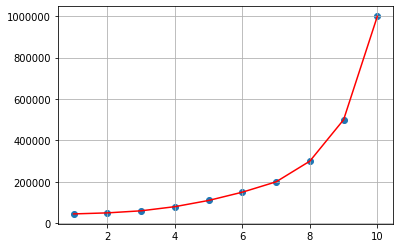

In [130]:
dataset = pd.read_csv('Dataset/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

# FEATURE SCALING isn't needed because the main principle is 
# the splitting of variables.

# THE SPLITTING DOESN'T OCCUR DUE TO THE SHAPE OF DATASET.

# ENCODING ISN'T NECESSARY.

# PERFORM THE TECHNIQUE.
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor(random_state = 0)
classifier.fit(X,Y)

DT = r2_score(Y, classifier.predict(X)) 
print('Coeff. di determinazione: {:.3f}'.format(DT))

# PREDICT A NEW VALUE.
classifier.predict([[6.5]])

# it functions also for outliers.

plt.scatter(X,Y)
plt.plot(X, classifier.predict(X), color = 'red')
plt.grid(True)
plt.show()

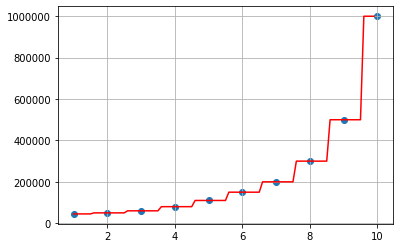

In [44]:
# It's not the best adopted model to two dimensional tables. 
# This occur beacause in each leaf there is only one value 
# so the consequence is that the predicted value is equal to the 
# mean of the value that it turns out to be the value.

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,Y)
plt.plot(X_grid, DTR.predict(X_grid), color = 'red')
plt.grid(True)
plt.show()

<h3><center> RANDOM FOREST REGRESSION </h3></center>

The **ensemble learning** is a methodology in which the procedure takes into account different algorithms. 
The steps are described as follows:

- Pick at random $K$ data points from the training set.
- Build the decision tree associated to these $K$ points.
- Choose the number of Ntree of trees wou want to build and repeat STEPS 1 and 2.
- For a new data point, make each one of your Ntree predict the value of $Y$ to for the new data point in question and assign the new data point the average across all of the predicted $Y$ values. 

Coeff. di determinazione: 0.963


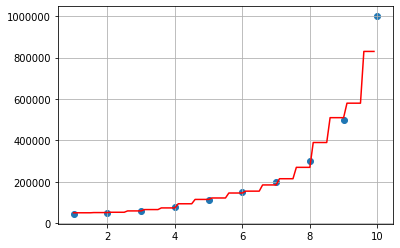

In [133]:
dataset = pd.read_csv('Dataset/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

# FEATURE SCALING isn't needed because the main principle is 
# the splitting of variables.

# THE SPLITTING DOESN'T OCCUR DUE TO THE SHAPE OF DATASET.

# ENCODING ISN'T NECESSARY.

# PERFORM THE TECHNIQUE.
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators=10)
classifier.fit(X,Y)

classifier.predict([[6.5]])
RF = r2_score(Y, classifier.predict(X)) 
print('Coeff. di determinazione: {:.3f}'.format(RF))


X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,Y)
plt.plot(X_grid, classifier.predict(X_grid), color = 'red')
plt.grid(True)
plt.show()

We can perform these algorithms on large dataset with a lot of attributes. However, it won't be possible to show the result. 

<h3><center> R-SQUARED </h3></center>

This parameter is used to compute how much the _Simple regression_ fit the data.
It's defined as follow:

$$R^2 = \frac{DS}{DT} ,$$ 

where:

$$DS = \sum_{i=1}^{N} (\hat{y}_i - \bar{y}),$$

$$DT=\sum_{i=1}^{N} (y_i - \bar{y}) .$$

There is also the **Adjusted $R^2$** which takes into account the number of regressors in multiple regression.

$$R^2 = 1-\frac{N-1}{N-k-1}\frac{DR}{DT} ,$$

where $K$ is the number of regressor, while $N$ the number of points.

Keep in mind that $R^2$ is biased in a multiple regression since the increase of the number of regressors entail the default increase of that parameter. So, it's important to introduce the adjusted parameter. 

<h3><center> HOW TO COMPARE DIFFERENT REGRESSION MODELS? </h3></center>

The $R^2$ is a good parameter in order to select the best model. 

Models are characterized by **parameter that are learnt** and **hyperparameters**, namely the default values of the model. The latters can be modified in order to increase the accuracy of the model. Noreover, since the overfitting must be avoided, the **regularization** techniques can be used, such as the _LASSO_ ,  _RIDGE REGRESSION_ and the _ELASTIC NET_ which add to the sum of squares a combination of parameters. 

In [148]:
print('Linear Regression: {:.2f}'.format(LR), '\n'
     'Multiple linear regression: {:.2f}'.format(MLR), '\n'
     'Polynomial linear regression: {:.2f}'.format(PLR), '\n'
     'Support vector regression: {:.2f}'.format(SVR_r_2), '\n'
     'Decision tree: {:.2f}'.format(DT), '\n'
     'Random forest: {:.2f}'.format(RF))


Linear Regression: 0.96 
Multiple linear regression: 0.95 
Polynomial linear regression: 1.00 
Support vector regression: 0.75 
Decision tree: 1.00 
Random forest: 0.96


The best is the polynomial linear regression since the decision trees presents overfitting.